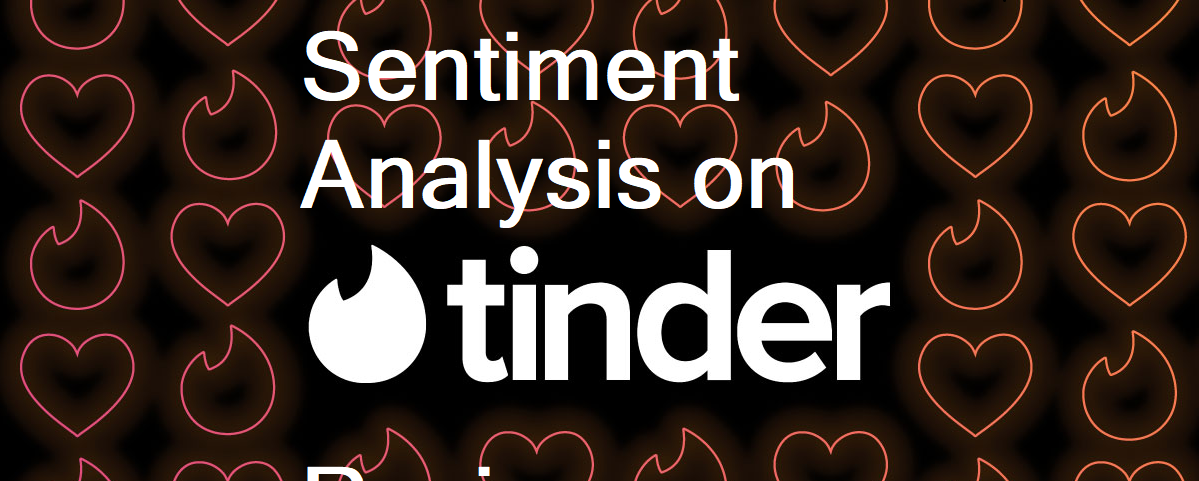

### Import required library

In [45]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#TEXT PREPROCESSING
import nltk
from nltk.corpus import stopwords
import string
import re
from wordcloud import WordCloud, STOPWORDS

#MODEL BUILDING
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

### Load & read the dataset

**Data set link**: https://www.kaggle.com/datasets/shivkumarganesh/tinder-google-play-store-review

In [46]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\\NLP Dataset\\tinder_google_play_reviews.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,1e59dbe8-c348-4080-a78c-eae1a013e98d,Sabatha Ngubane,https://play-lh.googleusercontent.com/a/AEdFTp7m5jCnvx7FIWvNScI5QEeCGa4Q4TPjPrw3qV_s=mo,It works for real 🤞😊,5,0,14.0.1,2023-01-20 01:25:50,NaN,NaN
1,5e74383b-9c70-4de0-b7f8-c34f7c15a910,Melvin Johnson,https://play-lh.googleusercontent.com/a-/AD5-WCnzF0IitshC36JCzS1pJjRMChmqzao0IRxTg0wneQ,nice app,5,0,14.0.1,2023-01-20 01:14:18,NaN,NaN
2,4221180c-5d94-45f8-9e29-c4c45563b2fa,Nunya Business,https://play-lh.googleusercontent.com/a/AEdFTp6uo_UCMvu0SMslVmFc16bJc2-XeqyimlkwSJyk=mo,"Incredibly spammy. The paid subscriptions INCREASE the spam. The top picks section seemingly only ever shows instagram and onlyfans models that live 100 miles away. The matches are based on your current location. App completely ignores your listed location and distance, only using your location services for matching. Everything about this app feels like they're trying to keep us here longer than we actually need to be.",1,123,14.0.1,2023-01-20 01:06:14,NaN,NaN
3,2c022e36-87e3-402d-bb72-659f4d853fce,bella unicorn,https://play-lh.googleusercontent.com/a-/AD5-WCk5kLsSKwq1kNpxNvJfV3ZdXs2gP91gDxSx0gL3xA,the only dating app I could stand to use!!,4,0,13.24.1,2023-01-20 00:51:06,NaN,NaN
4,2e8eb50f-744c-44be-a3db-948c9ce700f4,Jane Gozanes,https://play-lh.googleusercontent.com/a/AEdFTp7d9qRzkDYvz4nnvnNEfSNlbzpDz1A14sAOjraQ=mo,Nice app,4,0,NaN,2023-01-20 00:49:01,NaN,NaN


**Tinder is an online dating and geosocial networking application. Users "swipe right" to like or "swipe left" to dislike other users' profiles, which include their photo, a short bio, and a list of their interests. Tinder uses a "double opt-in" system where both users must match before they can exchange messages.**

In [47]:
df.shape

(571879, 10)

In [48]:
df.size

5718790

In [49]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571879 entries, 0 to 571878
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              571879 non-null  object
 1   userName              571875 non-null  object
 2   userImage             571879 non-null  object
 3   content               570539 non-null  object
 4   score                 571879 non-null  int64 
 5   thumbsUpCount         571879 non-null  int64 
 6   reviewCreatedVersion  453516 non-null  object
 7   at                    571879 non-null  object
 8   replyContent          47243 non-null   object
 9   repliedAt             47243 non-null   object
dtypes: int64(2), object(8)
memory usage: 43.6+ MB


In [51]:
df.describe()

,score,thumbsUpCount
count,571879.000000,571879.000000
mean,2.948605,1.782069
std,1.766208,29.385201
min,0.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,0.000000
max,5.000000,5489.000000


In [52]:
df.isna().sum()

reviewId                     0
userName                     4
userImage                    0
content                   1340
score                        0
thumbsUpCount                0
reviewCreatedVersion    118363
at                           0
replyContent            524636
repliedAt               524636
dtype: int64

#### We are going to deal with content and score so create new dataframe using these two column

In [53]:
pd.options.display.max_colwidth=100000000

In [54]:
data=df[['content','score']]
data.head()

,content,score
0,It works for real 🤞😊,5
1,nice app,5
2,"Incredibly spammy. The paid subscriptions INCREASE the spam. The top picks section seemingly only ever shows instagram and onlyfans models that live 100 miles away. The matches are based on your current location. App completely ignores your listed location and distance, only using your location services for matching. Everything about this app feels like they're trying to keep us here longer than we actually need to be.",1
3,the only dating app I could stand to use!!,4
4,Nice app,4


In [55]:
data.isna().sum()

content    1340
score         0
dtype: int64

In [56]:
data.dropna(inplace=True)
data.isna().sum()

content    0
score      0
dtype: int64

#### As we can see the "Content" column contains some emojis, numbers and special characters, for further analysis, the text should be cleaned.

### Text Preprocessing

In [57]:
stemmer=nltk.SnowballStemmer('english')
stemmer

In [58]:
stopwords=set(stopwords.words('english'))

In [59]:
def clean(text):
    text=str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [60]:
data['content']=data['content'].apply(clean)
data.head()

,content,score
0,work real 🤞😊,5
1,nice app,5
2,incred spammi paid subscript increas spam top pick section seem ever show instagram onlyfan model live mile away match base current locat app complet ignor list locat distanc use locat servic match everyth app feel like theyr tri keep us longer actual need,1
3,date app could stand use,4
4,nice app,4


### Create column sentiment class

In [61]:
def sentiments(x):
    if x==5:
        return 'positive'
    elif x>=2 and x<=4:
        return 'neutral'
    else:
        return 'negative'
    
    
data['Sentiment_class']=data['score'].apply(sentiments)
data.head()

,content,score,Sentiment_class
0,work real 🤞😊,5,positive
1,nice app,5,positive
2,incred spammi paid subscript increas spam top pick section seem ever show instagram onlyfan model live mile away match base current locat app complet ignor list locat distanc use locat servic match everyth app feel like theyr tri keep us longer actual need,1,negative
3,date app could stand use,4,neutral
4,nice app,4,neutral


### Most frequently used words in content

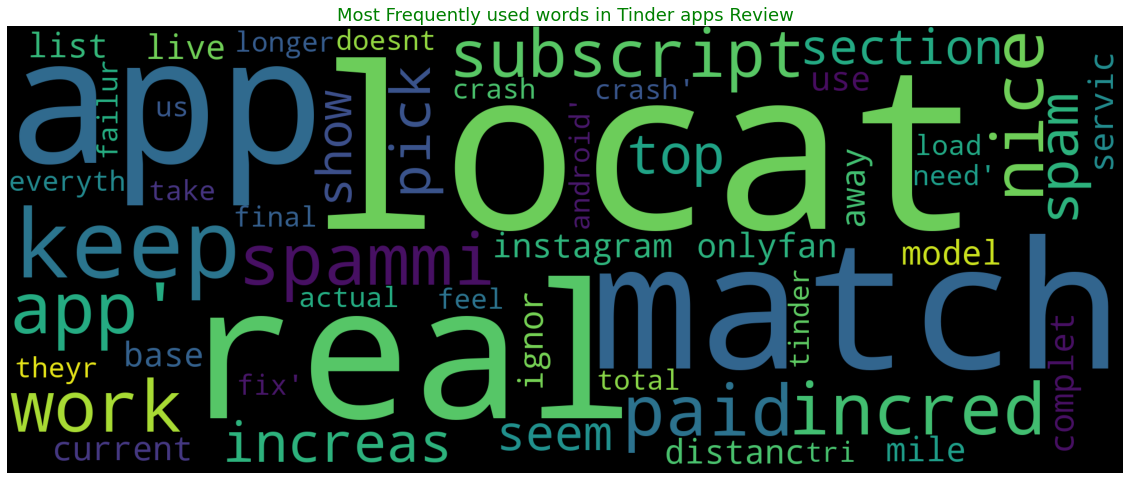

In [14]:
reviews=data['content'].values
word_cloud=WordCloud(max_words=5000, width=2000, height=800).generate_from_text(str(reviews))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Most Frequently used words in Tinder apps Review", fontsize=18, color='green')
plt.axis('off');

### Positive Sentiment words

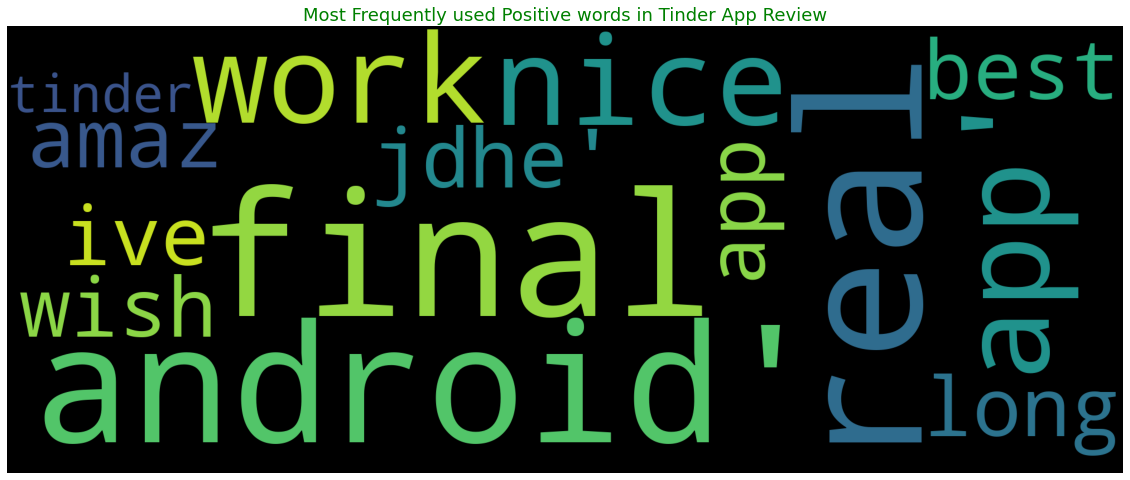

In [20]:
pos=data[data['Sentiment_class']=='positive']
reviews=pos['content'].values
word_cloud=WordCloud(max_words=5000, width=2000, height=800).generate_from_text(str(reviews))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Most Frequently used Positive words in Tinder App Review", fontsize=18, color='green')
plt.axis('off');

### Neutral Sentiment words

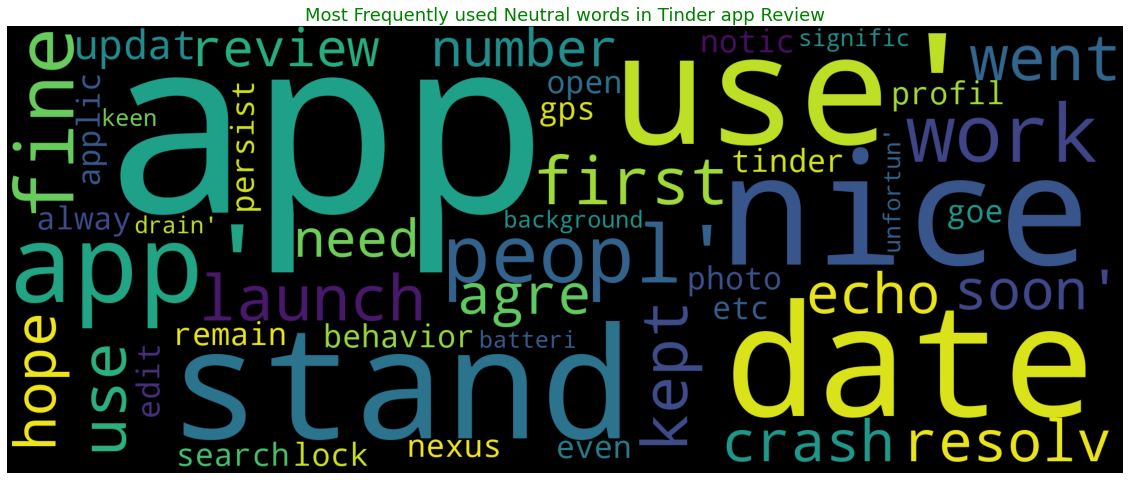

In [22]:
neu=data[data['Sentiment_class']=='neutral']
reviews=neu['content'].values
word_cloud=WordCloud(max_words=5000, width=2000, height=800).generate_from_text(str(reviews))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Most Frequently used Neutral words in Tinder app Review", fontsize=18, color='green')
plt.axis('off');

### Negative Sentiment words

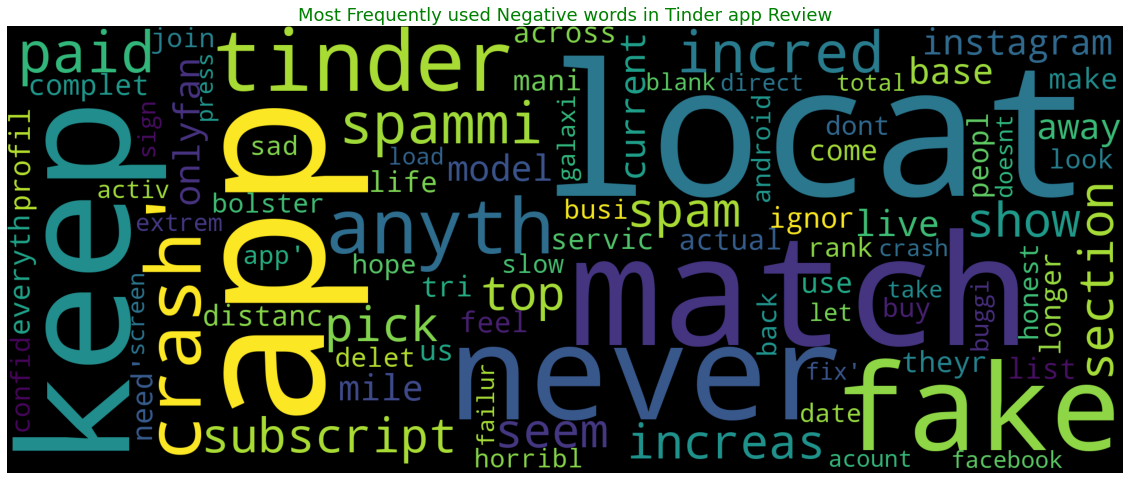

In [23]:
neg=data[data['Sentiment_class']=='negative']
reviews=neg['content'].values
word_cloud=WordCloud(max_words=5000, width=2000, height=800).generate_from_text(str(reviews))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Most Frequently used Negative words in Tinder app Review", fontsize=18, color='green')
plt.axis('off');

### Create Machine learning Classification model to predict Sentiment class

In [62]:
data['Sentiment_class'].replace({'positive':2,'neutral':1,'negative':0},inplace=True)
data.Sentiment_class.value_counts()

0    223708
2    194884
1    151947
Name: Sentiment_class, dtype: int64

**Every sentiment class has not equal rows this measn our data is not balanced. using under sampling the higher class, make the dataset balance.**

In [63]:
neu=data[data['Sentiment_class']==1]
pos=data[data['Sentiment_class']==2][:152461]
neg=data[data['Sentiment_class']==0][:152461]
data1=pd.concat([neu,pos,neg])
data1.Sentiment_class.value_counts()

2    152461
0    152461
1    151947
Name: Sentiment_class, dtype: int64

**Now each sentiment class has equal number of rows, and dataset is balanaced.**

### Split data into dependent(y) & independent(X)

In [30]:
X=data1['content']
y=data1['Sentiment_class']

### Train test split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(365906,) (91477,) (365906,) (91477,)


### Convert text to integer

In [35]:
tf=TfidfVectorizer(ngram_range=(1, 2))
tf_fitted=tf.fit(x_train)
x_train_tf=tf_fitted.transform(x_train)
x_test_tf=tf_fitted.transform(x_test)

In [36]:
x_train_tf.shape

(365906, 763982)

In [37]:
x_test_tf.shape

(91477, 763982)

### Logistic Regression

In [38]:
lr=LogisticRegression()
lr.fit(x_train_tf,y_train)
print("Train Score : ", lr.score(x_train_tf, y_train))
print("Test Score : ", lr.score(x_test_tf, y_test))

Train Score :  0.7555246429410832
Test Score :  0.7205855023667151


#### Test the model

In [64]:
content=[
'''
Full of beautiful women trying to get account numbers from crypto by gaining your confidence of love and
then slowly getting you to invest in crypto trading and eventually getting all your log in information
and account numbers by insisting you give them a screenshot of every step so you don't do anything wrong.
Why would a beautiful woman that is model material be interested in an old man??? Why would a beautiful 
woman that is model material be on a dating site at all??? When I realized I was being conned, I had to
change all my passwords to my bank, crypto accounts, emails etc... I also had to withdraw all my Coinbase
and ETH. money and put it in a safe wallet. After I did that, I noticed that all the values have been going
up consistently causing me to lose thousands...
''',
'''
THINK TWICE!!! BEFORE BUYING A GOLD OR PLATINUM SUBSCRIPTION FROM THIS NOT RESPECTFUL, NOT HONEST,
EGOISTICAL COMPANY. I used Tinder as a paid platinum subscriber with an annual (12-month) subscription.
After 4 months of use, my account was banned from Tinder without any explanation or warning.
''',
'''
So never thought I would say this but I found the love of my life on Tinder lol. So so many bad experiences
to go through to get to him. But honestly, he is worth all that sacrifice. Keep your head up folks, you will get there.
'''
]

dd=pd.DataFrame(content, columns=['content'])
dd['content1']=dd['content'].apply(lambda x : clean(x))
dd1=tf_fitted.transform(dd['content1'])
lr.predict(dd1)

array([0, 0, 2], dtype=int64)